# Tâche n°6 : Etudier un effet de symmétrie sur trois atomes distincts.

Pour commencer, les informations de notre matériau sont téléchargées via le site [Materials Project](https://materialsproject.org)

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.core.operations import SymmOp
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import SpacegroupAnalyzer

with MPRester("xWGoUhg0LtBEwfAi") as m:
    structure = m.get_structure_by_material_id("mp-754537") #object structure
    truestru = SpacegroupAnalyzer(structure).get_primitive_standard_structure() #Object structure
    sg = SpacegroupAnalyzer(truestru) #objet SpacegroupAnalyzer

Ensuite, différentes petites manipulations sont réalisées afin de pouvoir commencer l'analyse des symmétries.
En effet, un site internet permmettant de représenter les opérations de symétrie a été donné ([Jmol Crystal Symmetry Explorer](https://www.pslc.ws/jsmol/jcse/explore.htm)). 
Un object "SpacegroupAnalyzer" est crée de manière conventionnel et approprié avec le site fournis ci-dessus.

In [33]:
conv  = SpacegroupAnalyzer(sg.get_conventional_standard_structure()) #nouvel object conventionnel SpacegroupAnalyzer

Pour terminer les manipulations, une liste de toutes les opérations de symétries étaient nécessaires. 36 opérations de symmétries sont trouvé pour la molécule LiLuO2.

In [34]:
symetrie = conv.get_symmetry_operations()

## 1) Inversion pour un atome d'oxygène

Une première opération de symétrie est appliquée à l'atome d'oxygène en position (0.67,0.33,0.58).Ces positions sont trouvées via le site [Jmol Crystal Symmetry Explorer](https://www.pslc.ws/jsmol/jcse/explore.htm (position n°7 sur le site)
Cette opération est la deuxième opération de symétrie du site ([Jmol Crystal Symmetry Explorer](https://www.pslc.ws/jsmol/jcse/explore.htm)). 

In [35]:
Inversion = symetrie[1] #Nous donne la matrice d'inversion
Inversion.operate((0.67, 0.33, 0.58))
print("La matrice de rotation de l'inversion est ", Inversion.rotation_matrix)
print("Le vecteur de translation de l'inversion est ", Inversion.translation_vector)
print("Les coordonées du vecteurs après inversion sont",Inversion.operate((0.67, 0.33, 0.58)) )

La matrice de rotation de l'inversion est  [[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
Le vecteur de translation de l'inversion est  [0. 0. 0.]
Les coordonées du vecteurs après inversion sont [-0.67 -0.33 -0.58]


Ci-dessous, une photo représentant l'effet de cette symétrie.

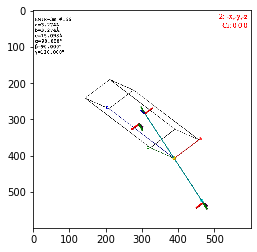

In [36]:
img = mpimg.imread("inversionO2.png")
plt.imshow(img)
plt.show()

## 2) Réflexion sur un atome de luthécium
Une opération de symétrie est maintenant appliquée à un atome de Luthécium qui se trouve en position (0.33,0.67,0.17). Le plan miroir choisir est le plan (-y,-x,z) (symétrie n°8 sur le site [Jmol Crystal Symmetry Explorer](https://www.pslc.ws/jsmol/jcse/explore.htm).) 

In [37]:
reflex = symetrie[7]
reflex.operate((0,33,0.67,0.17))
print("La matrice de rotation de la réflexion est ", reflex.rotation_matrix)
print("Le vecteur de translation de la réflexion est ", reflex.translation_vector)
print("Les coordonées du vecteurs après la réflexion sont",reflex.operate((0,33,0.67,0.17)))

La matrice de rotation de la réflexion est  [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


AttributeError: 'SymmOp' object has no attribute 'translation_matrix'

Ci-dessous une image représentant l'effet de la réflexion sur l'atome de luthécium.

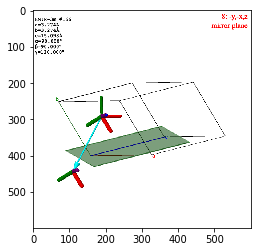

In [17]:
img = mpimg.imread("reflexionLu.png")
plt.imshow(img)
plt.show()

## 3) Translation sur un atome de lithium
La dernière opération est une opération de translation sur un atome de lithium qui se trouve en position (0.67,0.33,0.33). La translation s'effectue d'une valeure de 

In [38]:
translation = symetrie[12]
translation.operate((0.67,0.33,0.33))
print("La matrice de rotation de la translation est ", translation.rotation_matrix)
print("La matrice de translation de la translation est ", translation.translation_vector)
print("Les coordonées du vecteurs après la translation sont",translation.operate((0.67,0.33,0.33)))

La matrice de rotation de la translation est  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
La matrice de translation de la translation est  [0.66666667 0.33333333 0.33333333]
Les coordonées du vecteurs après la translation sont [1.33666667 0.66333333 0.66333333]


Ci-dessous une image représentant l'effet de la translation  sur l'atome de Lithium.

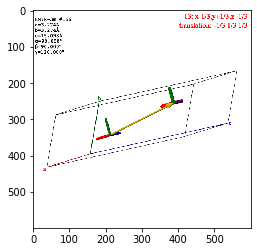

In [22]:
img = mpimg.imread("translationLi.png")
plt.imshow(img)
plt.show()